In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet               #stereonet package 
import ternary as te              #python-ternary diagram package
from numpy.linalg import eigh

## 1.0 Data

In [102]:
#Import a csv file
df = pd.read_csv(r'C:\Users\iamma\Documents\Research_projects\Manitoba\Till_fabrics\805_B02.csv') #Specify the path to your file
df.head() #To show just the first 5 rows

,Trend,Plunge
0,72,8
1,262,38
2,284,12
3,274,18
4,255,28


In [103]:
#Create an array from the 'trend' column of the dataframe and display horizontally (one line)
Trend=df.loc[:,'Trend']
Trend=np.hstack(Trend)

In [104]:
#Do the same for the plunge data

Plunge=df.loc[:,'Plunge']
Plunge=np.hstack(Plunge)

## 2.0 Data projections

In [105]:
#Let's prepare the data to build a rose diagram

#Calculate the number of directions (bins) every 10° using numpy.histogram.

bin_edges = np.arange(-5, 366, 10)                              #numpy.arange(start, stop, step)
trends_in_bins, bin_edges = np.histogram(Trend, bin_edges)

In [106]:
Trends=trends_in_bins[0:-1]                  #37 bins

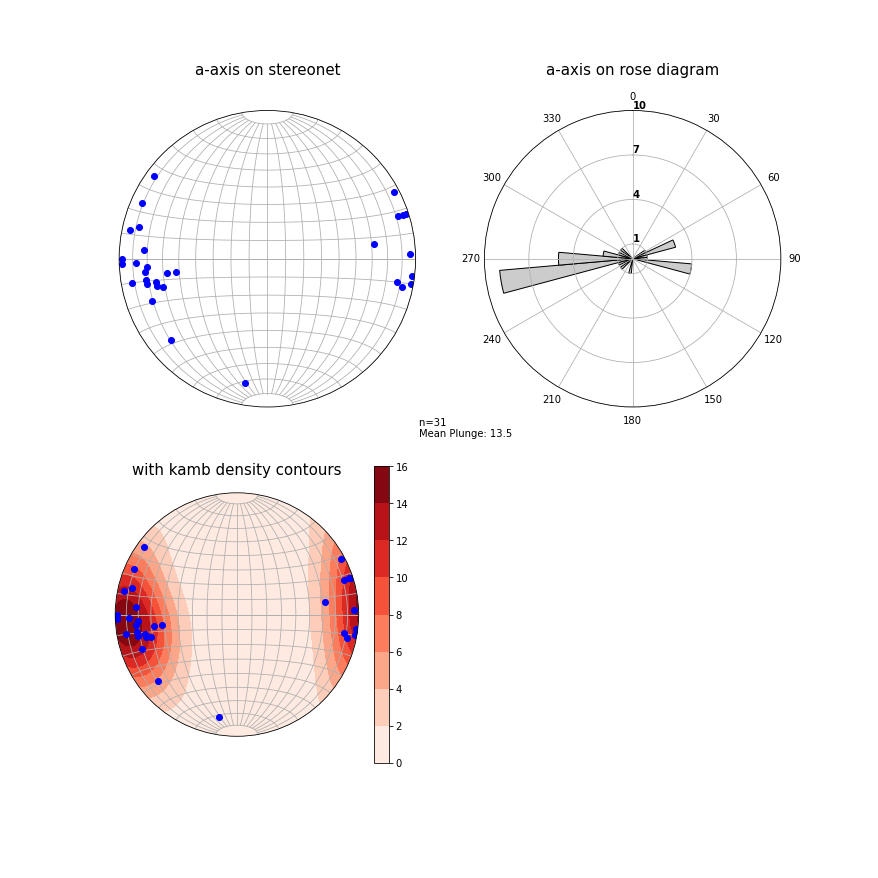

In [107]:
#Create the rose diagram and the stereonets.

fig = plt.figure(figsize=(12, 12))         #creates an empty figure with no Axes

ax1 = fig.add_subplot(221, projection='stereonet')
ax1.line(Plunge, Trend, 'o', color='blue')
ax1.set_title('a-axis on stereonet', y=1.10, fontsize=15)

#Rose diagram
ax2 = fig.add_subplot(222, projection='polar')
ax2.set_title('a-axis on rose diagram', y=1.10, fontsize=15)

ax2.bar(np.deg2rad(np.arange(0, 360, 10)), Trends, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_thetagrids(np.arange(0, 360, 30), labels=np.arange(0, 360, 30))
ax2.set_rgrids(np.arange(1, Trends.max() + 4, 3), angle=0, weight= 'black')

ax3 = fig.add_subplot(223, projection='stereonet')
ax3.line(Plunge, Trend, 'o', color='blue')
m=ax3.density_contourf(Plunge, Trend, measurement='lines', cmap='Reds') #exponential_kamb is the default method
ax3.set_title('with kamb density contours', y=1.05, fontsize=15)
fig.colorbar(m) 


# Plot these things on the two stereonets
for ax in [ax1, ax3]:
    ax.grid()
    ax.set_azimuth_ticks([]) #This is to hide the azimuth labels

for ax in [ax1]:
    note = f"n={Plunge.size} \nMean Plunge: {Plunge.mean():.1f}"
    ax.annotate(note, xy=(5*60, -30), xycoords='axes points')  

plt.show()
fig.savefig('Stereonets_Rose.svg', bbox_inches = 'tight', format='svg')

## 3.0 Orientation tensors

In [108]:
#Calculate direction cosines...

a=np.cos(Trend*np.pi/180)
b=np.cos(Plunge*np.pi/180)     
c=np.sin(Trend*np.pi/180)
xi=(a*b).round(4) #first direction cosines.
yi=(c*b).round(4) #second direction cosines
zi=np.sin(Plunge*np.pi/180).round(4) #third direction cosines

In [109]:
X=np.concatenate((xi,yi,zi)).reshape(3,Trend.shape[0])    #Brings the three direction cosines (xi, yi, zi) together in a single 3XN array/matrix (N=nb# of measurements)

In [110]:
XT=X.T               #Transpose matrix X
print(XT)

[[ 0.306   0.9418  0.1392]
 [-0.1097 -0.7803  0.6157]
 [ 0.2366 -0.9491  0.2079]
 [ 0.0663 -0.9487  0.309 ]
 [-0.2285 -0.8529  0.4695]
 [-0.172  -0.9752  0.1392]
 [-0.6179 -0.7364  0.2756]
 [ 0.2068 -0.9728  0.1045]
 [ 0.3083  0.9487  0.0698]
 [-0.9467 -0.1669  0.2756]
 [-0.1899 -0.8936  0.4067]
 [ 0.4683  0.8808  0.0698]
 [-0.     -0.9994  0.0349]
 [-0.221  -0.8864  0.4067]
 [ 0.3088  0.9505  0.0349]
 [-0.1651 -0.9366  0.309 ]
 [-0.118  -0.8398  0.5299]
 [-0.2059  0.9686  0.1392]
 [-0.0341 -0.9776  0.2079]
 [ 0.5846 -0.8046  0.1045]
 [ 0.4028 -0.9047  0.1392]
 [-0.1735  0.9842  0.0349]
 [ 0.1229  0.8744  0.4695]
 [-0.1699  0.9633  0.2079]
 [-0.3253 -0.8937  0.309 ]
 [-0.1218  0.9919  0.0349]
 [-0.0994 -0.9458  0.309 ]
 [-0.0349 -0.9988  0.0349]
 [-0.1977 -0.9303  0.309 ]
 [ 0.0348  0.997   0.0698]
 [-0.0655 -0.9374  0.342 ]]


In [111]:
A=np.dot(X,XT).round(4)    #3X3 matrix of the sums of cross products of the direction cosines
print(A)

[[ 2.9024  1.8296 -0.8318]
 [ 1.8296 25.6702 -3.7993]
 [-0.8318 -3.7993  2.4276]]


In [112]:
#Get the eigenvalues and eigenvectors using mplstereonet

plu, azi, vals = mplstereonet.eigenvectors(Plunge, Trend, measurement='lines') 
#This returns 1-D arrays for plunge and azimuth (eigenvectors converted to spherical coordinates), and normalized eigenvalues
print(plu,azi,vals)

[ 9.12412145 23.49273629 64.59494322] [265.22968544 171.22665626  14.99438461] [0.86672527 0.09789627 0.0517719 ]


In [113]:
#Extract the normalized eigenvalues
S1=vals[0].round(4)
S2=vals[1].round(4)
S3=vals[2].round(4)
print(S1,S2,S3)
#The eigenvalues are slightly different with mplstereonet than with Stereonet 11

0.8667 0.0979 0.0518


In [114]:
Ei=eigh(A)  #This returns a 1-D array (eigenvalues) and a 2-D array (eigenvectors)

In [115]:
Eighv=Ei[0] #Extract the eigenvalues
print(Eighv)

[ 1.57921016  2.98588139 26.43510845]


In [116]:
#The sum of eigenvalues equals to the nb# of measurements. 
#Normalized eigenvalues (divided by number of measurements) sum to 1.

S1=Eighv[2]/Trend.shape
S2=Eighv[1]/Trend.shape
S3=Eighv[0]/Trend.shape
print(S1, S2, S3)  
#normalized eigenvalues; the values obtained with eigh are the same as those obtained using Stereonet 11

[0.85274543] [0.09631875] [0.05094226]


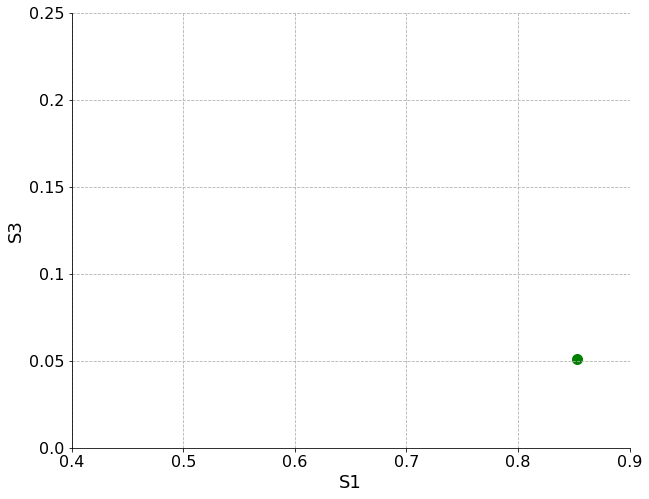

In [117]:
#Make a biplot of S3 and S1

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1) # row-col-num

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_xlim((0.4, 1.0,))
#ax.set_ylim((0.0, 0.3))

#xticks = np.arange(0.4, 1.0, 0.1).round(2)
#yticks = np.arange(0.0, 0.3, 0.05).round(2)

xtickLocations=np.arange(0.4, 1.0, 0.1).round(2)
yticklocations=np.arange(0.0, 0.3, 0.05).round(2)


ax.scatter(S1,S3, c='green', s=100)
ax.set_xlabel('S1', fontsize=18)
ax.set_ylabel('S3', fontsize=18)
ax.set_xticks(ticks= xtickLocations)
ax.set_yticks(ticks=yticklocations)
ax.set_xticklabels(xticks, fontsize=16)
ax.set_yticklabels(yticks, fontsize=16)

ax.grid(True, linestyle='--')
plt.show()
fig.savefig('S3_S1plot.svg', bbox_inches = 'tight', format='svg')

In [118]:
E=(1-(S2/S1)).round(4)     #Elongation index

In [119]:
I=(S3/S1).round(4)        #Isotropy index

In [120]:
R=(1-(E+I)).round(4)    #A residual value to allow plotting the indices correctly on a ternary diagram

In [121]:
df=pd.DataFrame(columns=['E','I', 'R'])

In [122]:
df.loc[0]=[E,I,R]
df

,E,I,R
0,[0.887],[0.0597],[0.0533]


In [123]:
df["E"]=df['E'].astype('float')      #To specify the Dtype is 'float'
df["I"]=df['I'].astype('float')
df["R"]=df['R'].astype('float')
df.dtypes

E    float64
I    float64
R    float64
dtype: object

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E       1 non-null      float64
 1   I       1 non-null      float64
 2   R       1 non-null      float64
dtypes: float64(3)
memory usage: 32.0 bytes


In [125]:
df

,E,I,R
0,0.887,0.0597,0.0533


In [136]:
#This will ask the user to classify the fabric modality

Mod=input("What is the modality of the fabric? ")

if Mod=="un" or Mod=="su" or Mod=="bi" or Mod=="sb" or Mod=="mm":
    print("Thank you")
else:
    print("This is not a valid answer")


What is the modality of the fabric? su
Thank you


In [137]:
if Mod=='un':
    Modal=0
elif Mod=='su':
    Modal=1
elif Mod=="bi":
    Modal=2
elif Mod=="sb":
    Modal=3
elif Mod=="mm":
    Modal=4

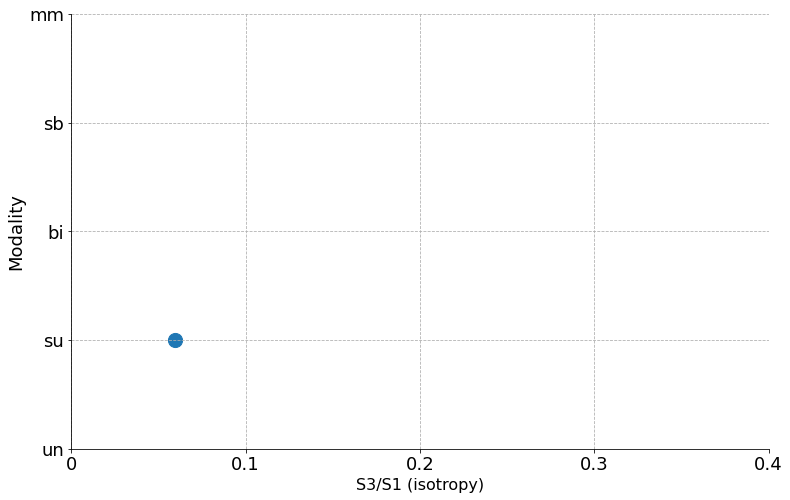

In [138]:
#Create the modality-isotropy plot

fig = plt.figure(figsize=(12.5,8))
ax = fig.add_subplot(1,1,1) # row-col-num

ylocations=[0,1,2,3,4]
labels=["un", 'su', 'bi', 'sb', 'mm']

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#PLot the dots and assign ticks and labels
ax.scatter(I, Modal, s=200)
ax.set_yticks(ticks=ylocations)
ax.set_yticklabels(labels, fontsize=18)

xticks = [ 0, 0.1, 0.2, 0.3, 0.4 ]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=18)

plt.xlabel(r'S3/S1 (isotropy)', fontsize=16)
plt.ylabel('Modality', fontsize=18)

#Add the grid lines and show the plot
ax.grid(True, linestyle='--')
plt.show()
fig.savefig('Modality_IsotropyPlot.svg', bbox_inches = 'tight', format='svg')

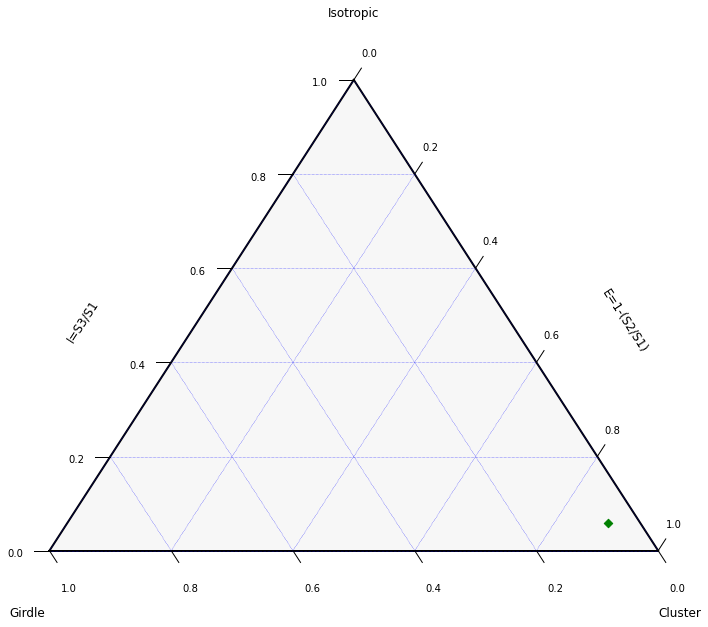

In [139]:
#Let's plot the results on a ternary diagram!

scale = 1.0
figure, fabric = te.figure(scale=scale)
figure.set_size_inches(12,10)

#PLot the data
fabric.scatter(df[['E','I','R']].values, marker='D', color='green', label="Green Diamonds")
    
# Draw Boundary and Gridlines
fabric.boundary(linewidth=2.0)
fabric.gridlines(color="blue", multiple=0.2)
    
# Set Axis labels
fontsize = 12
offset = 0.2
fabric.left_axis_label("I=S3/S1", fontsize=fontsize, offset=0.2)
fabric.right_axis_label("E=1-(S2/S1)", fontsize=fontsize, offset=0.2)
fabric.top_corner_label("Isotropic", fontsize=fontsize, offset=0.25)
fabric.right_corner_label("Cluster", fontsize=fontsize, offset=-0.05)
fabric.left_corner_label("Girdle", fontsize=fontsize, offset=-0.05)

#This is to configure the style of the axes and ticks and specify their orientation/sense
fabric.ticks(axis='lbr', multiple=0.2, linewidth=1, offset=0.025, tick_formats="%.1f", clockwise=True)
fabric.get_axes().axis('off')
fabric.clear_matplotlib_ticks()

fabric.show()
fabric.savefig('Ternary_Diagram.svg', bbox_inches = 'tight', format='svg')

In [140]:
#Extract V1, V2, and V3
V1_azi=azi[0]
V1_azi=V1_azi.round(1)
V1_plunge=plu[0]
V1_plunge=V1_plunge.round(1)
V2_azi=azi[1]
V2_azi=V2_azi.round(1)
V2_plunge=plu[1]
V2_plunge=V2_plunge.round(1)
V3_azi=azi[2]
V3_azi=V3_azi.round(1)
V3_plunge=plu[2]
V3_plunge=V3_plunge.round(1)
print("V1 is", V1_plunge, "\u2192", V1_azi)
print("V2 is", V2_plunge, "\u2192", V2_azi)
print("V3 is", V3_plunge, "\u2192", V3_azi)

V1 is 9.1 → 265.2
V2 is 23.5 → 171.2
V3 is 64.6 → 15.0


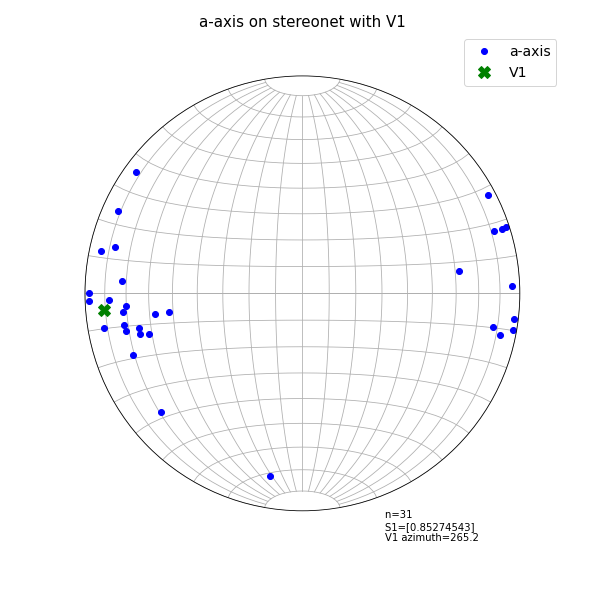

In [141]:
#Now V1 can be added to the data points on the stereonet

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='stereonet')
ax.line(Plunge, Trend, 'o', color='blue', label='a-axis')
plunge=V1_plunge
bearing=V1_azi
ax.line(plunge, bearing, 'X', color='green', markersize=12, label="V1")
ax.set_title('a-axis on stereonet with V1', y=1.10, fontsize=15)


#This is to display the legend in the upper right corner without overlapping the stereonet
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=14)

#This is another approach to remove duplicate labels in the legend
#def legend_without_duplicate_labels(ax):
    #handles, labels = ax.get_legend_handles_labels()
    #unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    #ax.legend(*zip(*unique))
    
#Another approach to avoid repetition of labels in the legend:
from collections import OrderedDict

handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

#This is to display the legend in the upper right corner without overlapping the stereonet
ax.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=14)


#Add some notes and values beside the plot
note = f"n={Plunge.size} \nS1={S1} \nV1 azimuth={V1_azi}"
ax.annotate(note, xy=(5*60, -30), xycoords='axes points')



ax.grid()
ax.set_azimuth_ticks([])
plt.show()
fig.savefig('Stereonet_w_V1.svg', bbox_inches = 'tight', format='svg')

In [142]:
#Output a proposed interpretation based on the above results and plots

if Mod=='un' or Mod=='su' and S1>=0.7 and I<0.12:
    print('Very strong till clast fabric; Can be used for paleo-ice flow')
elif Mod=='bi' or Mod=='sb' and S1>=0.7 and I<0.2:
    print("Strong or moderately strong till clast fabric; use for paleo-ice flow with caution")
elif Mod=='sb' and S1>0.55 and S1<0.7 and I>=0.12:
    print("Moderate till clast fabric; interpret paleo-ice flow with great caution; check other data and local context")
elif S1<=0.55 and I>=0.12:
    print("Weak till clast fabric; unreliable for paleo-ice flow")
else: print("Undefined; check data and plots")


Very strong till clast fabric; Can be used for paleo-ice flow


In [143]:
if V1_azi>=0 and V1_azi<180:
    Ice_Flow=(V1_azi+180).round()
else: 
    Ice_Flow=(V1_azi-180).round()
          

In [144]:
#Provide a paleo-ice flow direction based on V1 (if S1>0.57)

if S1>0.57 and V1_plunge>2:
    print('Paleo-ice flow was likely toward', Ice_Flow)
elif S1>0.57 and V1_plunge<2:
    print("Orientation likely reliable but V1 plunge too low; direction could be opposite; check local context")
else: 
    print("Paleo-ice flow direction is uncertain/unreliable")

Paleo-ice flow was likely toward 85.0
